<a href="https://colab.research.google.com/github/czambrano26/MAT-421/blob/main/ModuleG_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 21.4 - Simpson's Rule

---
Simpson's rule approximates the area under function f(x) over the subintervals [x_(i-1), x_i] and [x_i, x_(i+1)]. It does so by fitting a quadratic polynomial through three points: (x_(i-1), f(x_(i-1)), (x_i, f(x_i)), and (x_(i+1), f(x_(i+1))). 

** Note: In order to use Simpson's rule, we must have an even number of intervals (an odd number of grid points)

Ex. Use Simpson's Rule to approximate the integral of cos(x)dx from 3π/2 to 5π/2. Use 11 evenly spaced grid points over the whole interval. Compare the approximations to the exact value of 2.

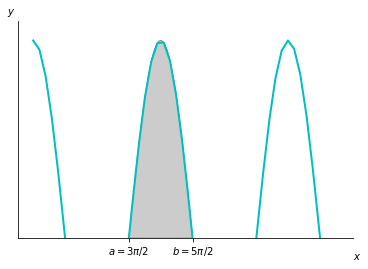

2.0001095173150043
-0.00010951731500430384


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import math

def func(x):
    return np.cos(x)

a, b = 3*math.pi/2, 5*math.pi/2  # integral limits
x = np.linspace(0, 15)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'c', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='0.5')
ax.add_patch(poly)

fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([a, b], labels=['$a = 3π/2$', '$b = 5π/2$'])
ax.set_yticks([])
plt.show()


a = 3*math.pi/2
b = 5*math.pi/2
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.cos(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

Section 21.4 - Computing Integrals in Python

---
The scipy.integrate sub-package has several packages for computing integrals. 

Ex. Use the trapz function to approximate the integral of cos(x)dx from 3π/2 to 5π/2. Use 11 evenly spaced grid points over the whole interval. Compare the approximations to the exact value of 2.

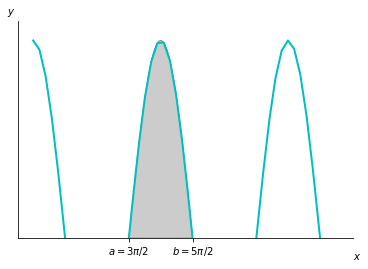

1.9835235375094544
-0.00010951731500430384


In [11]:
from scipy.integrate import trapz

a, b = 3*math.pi/2, 5*math.pi/2  # integral limits
x = np.linspace(0, 15)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'c', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='0.5')
ax.add_patch(poly)

fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([a, b], labels=['$a = 3π/2$', '$b = 5π/2$'])
ax.set_yticks([])
plt.show()

a = 3*math.pi/2
b = 5*math.pi/2
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.cos(x)

I_trapz = trapz(f,x)
err_trapz = 2 - I_simp

print(I_trapz)
print(err_trapz)

We can use the cumtrapz function cumsum to approximate cumulative intergrals. 


Ex. Use the cumtrapz function to approximate the integral of cos(x)dx from 3π/2 to 5π/2 with a discretization step of 0.01. Plot this against the exact solution, cos(x)

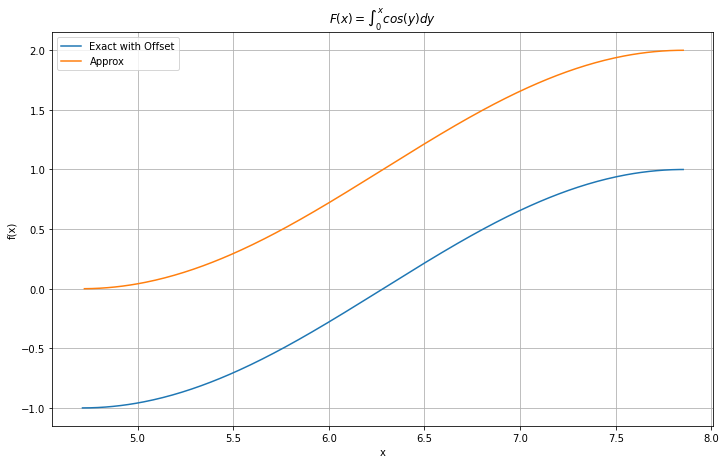

In [14]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

x = np.arange(3*math.pi/2, 5*math.pi/2, 0.01)
F_exact = np.sin(x)
F_approx = cumtrapz(np.cos(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} cos(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

The quad(f, a, b) function used a different numerical differentiation scheme to approximate integrals. 


Ex. Use the integrate.quad function to compute the integral of cos(x)dx from 3π/2 to 5π/2. Compare the answer with the correct answer of 2. 

In [15]:
from scipy.integrate import quad 

I_quad, est_err_quad = \
          quad(np.cos, 3*math.pi/2, 5*math.pi/2)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0
